<a href="https://colab.research.google.com/github/team0243/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

##Generate Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

##Explore Data

In [4]:
X.shape

(500, 2)

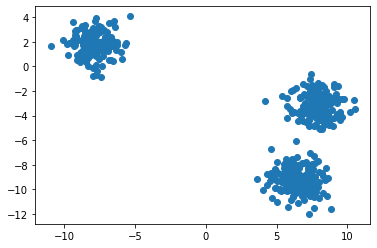

In [5]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##Clustering

###import

In [6]:
from sklearn.cluster import KMeans

###Define

In [7]:
kmeans = KMeans(n_clusters=2, random_state=6)

###Fit-Predict

In [8]:
y_clust = kmeans.fit_predict(X)

In [9]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

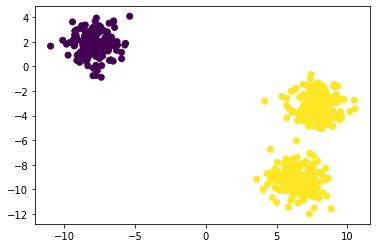

In [10]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

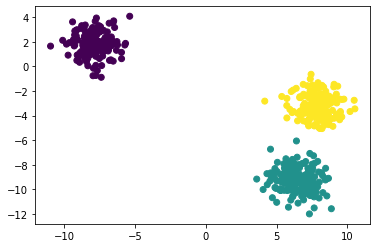

In [11]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

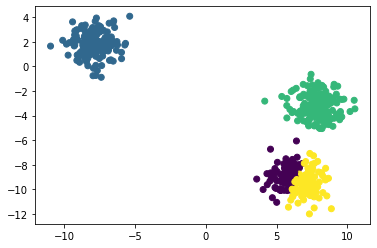

In [12]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

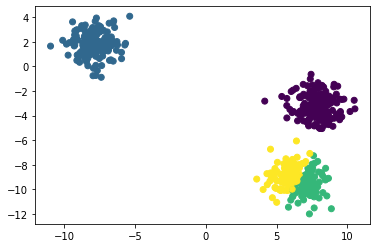

In [13]:
#define
kmeans = KMeans(n_clusters=4, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

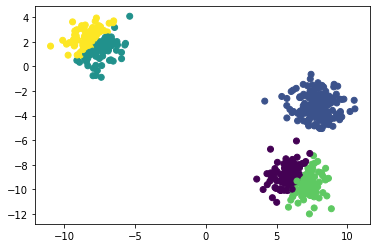

In [14]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

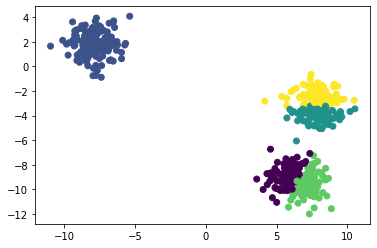

In [15]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

#Exanple Application (Color Quantization)

In [24]:
import cv2
import os

In [48]:
img = cv2.imread('/content/chinchilla-1801736_640.jpg')

In [50]:
img.shape

AttributeError: ignored

In [42]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

error: ignored

###นับจำนวนสี

In [ ]:
import numpy as np

In [ ]:
np.unique(np.reshape(RGB_img, (RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

###จัดกลุ่มให้เหลือ 16 สี

In [ ]:
myquantize = KMeans(n_clusters=16, random_state=6)

###แปลงข้อมูลให้อยู่ในรูป row-column

In [ ]:
img_row = np.reshape(RGB_img, (RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

In [ ]:
final_color = myquantize.fit_predict(img_row)

###ใช้ centroid เป็นตัวแทนของสี

In [ ]:
centroid = myquantize.cluster_centers_

In [ ]:
centroid

###แทนสีคืนลงไป

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

In [ ]:
plt.imshow(new_img/255)

In [ ]:
plt.imsave('img.jpg',new_img/255)

In [ ]:
plt.imshow(RGB_img)